# 6장. 학습 관련 기술들

https://github.com/WegraLee/deep-learning-from-scratch

이 코드의 내용은 Deep Learning from Scratch를 참고했음을 밝힙니다.

![image.png](https://i.imgur.com/0CcM46E.png)

### 확률적 경사 하강법(SGD)(p190)

![image.png](https://i.imgur.com/80thYx9.png)

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
# SGD 클래스를 사용하면 신경망 매개변수의 진행을 다음과 같이 수행할 수 있습니다.
# (다음 코드는 실제로는 동작하지 않는 의사 코드입니다)

# network = TwoLayerNet(...)
# optimizer = SGD()

# for i in range(10000):
#     ...
#     x_batch, t_batch = get_mini_batch(...) # 미니배치
#     grads = network.gradient(x_batch, t_batch)
#     params = network.params
#     optimizer.update(params, grads)

### SGD의 단점(p192)

![image.png](https://i.imgur.com/Y4LNTHZ.png)

* f(x,y)의 그래프(왼쪽)와 그 등고선(오른쪽)<br><br>

![image.png](https://i.imgur.com/LByqXQG.png)
![image.png](https://i.imgur.com/lAvJ57f.png)
<br>
이 함수는 '밥그릇'을 x축 방향으로 늘인 듯한 모습이고, 실제로 그 등고선은 x축 방향으로 늘인 타원으로 되어 있습니다. 또한 이 함수의 기울기는 y축 방향은 크고 x축 방향은 작다는 것이 특징입니다. 말하자면 y축 방향은 가파른데 x축 방향은 완만한 것이죠. 또, 여기에서 주의할 점으로는 식 f(x,y)가 최솟값이 되는 장소는 (x,y) = (0,0)이지만, 식 f(x,y)가 보여주는 기울기 대부분은 (0,0) 방향을 가리키지 않는다는 것입니다.

* SGD에 의한 최적화 갱신 경로 : 최솟값인 (0,0)까지 지그재그로 이동하니 비효율적이다.<br><br>

![image.png](https://i.imgur.com/TkVDUaa.png)

즉, SGD의 단점은 비등방성(anisotropy) 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이라는 것입니다.

### 모멘텀(p194)

모멘텀(Momentum)은 '운동량'을 뜻하는 단어로, 물리와 관계가 있습니다(관성 이용).

![image.png](https://i.imgur.com/CJHuPS2.png)
![image.png](https://i.imgur.com/VHKEh4D.png)

In [3]:
# 인스턴스 변수 v가 물체의 속도입니다.
# v는 초기화 떄는 아무 값도 담지 않고, 대신 update()가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장힙니다.

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

* 모멘텀에 의한 최적화 갱신 경로<br><br>
![image.png](https://i.imgur.com/rfQ1D2O.png)

그림에서 보듯 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직입니다. SGD와 비교하면 '지그재그 정도'가 덜한 것을 알 수 있죠. 이는 x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문입니다. 거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않습니다. 전체적으로는 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듭니다.

### AdaGrad(p196)

신경망 학습에서는 학습률 값이 중요합니다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않습니다.<br>
이 학습률을 정하는 효과적 기술로 학습률 감소(learning rate decay)가 있습니다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법입니다. 처음에는 크게 학습하다가 조금씩 작게 학습한다는 얘기로, 실제 신경망 학습에 자주 쓰입니다.<br>
학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것이겠죠. 이를 더욱 발전시킨 것이 AdaGrad입니다. AdaGrad는 '각각의' 매개변수에 '맞춤형' 값을 만들어줍니다.<br>
AdaGrad는 개별 매개변수에 적응적으로(adaptive) 학습률을 조정하면서 학습을 진행합니다.

![image.png](https://i.imgur.com/CKk0Z3i.png)
![image.png](https://i.imgur.com/CIcJ3w7.png)

매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻인데, 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻하죠. 즉, 많이 변해온 파라미터는 조금씩 스텝을 밟게 하고, 적게 변해온 파라미터는 크게 스텝을 밟게 합니다.

AdaGrad는 과거의 기울기를 제곱하여 계속 더해갑니다. 그래서 학습을 진행할수록 갱신 강도가 약해집니다. 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게 되죠. 이 문제를 개선한 기법으로서 RMSProp이라는 방법이 있습니다. RMSProp은 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영합니다. 이를 지수이동평균(Exponential Moving Average, EMA)이라 하여, 과거 기울기의 반영 규모를 기하급수적으로 감소시킵니다.

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zero_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 1e-7은 self.h[key]에 0이 담겨 있다 해도 0으로 나누는 사태를 막아줍니다. 대부분의 딥러닝 프레임워크는 이 값도 인수로 설정할 수 있습니다.

![image.png](https://i.imgur.com/yTWXQFF.png)

위 그림을 보면 최솟값을 향해 효율적으로 움직이는 것을 알 수 있습니다. y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됩니다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어듭니다.

### Adam(p199)

모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였습니다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했습니다. 그럼 혹시 이 두 기법을 융합하면 어떻게 될까요? 이런 생각에서 출발한 기법이 바로 Adam입니다.<br>
Adam은 2015년에 제안된 새로운 방법입니다. 그 이론은 다소 복잡하지만 직관적으로는 모멘텀과 AdaGrad를 융합한 듯한 방법입니다. 이 두 방법의 이점을 조합했다면 매개변수 공간을 효율적으로 탐색해줄 것으로 기대해도 좋겠죠? 또, 하이퍼파라미터의 '편향 보정'이 진행된다는 점도 Adam의 특징입니다.

![image.png](https://i.imgur.com/BcUnHYI.png)

위 그림과 같이 Adam 갱신 과정도 그릇 바닥을 구르듯 움직입니다. 모멘텀과 비슷한 패턴인데, 모멘텀 때보다 공의 좌우 흔들림이 적습니다. 이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택입니다.

Adam은 하이퍼파라미터를 3개 설정합니다. 하나는 지금까지의 학습률(논문에서는 a로 등장), 나머지 두 개는 일차 모멘텀용 계수 B1과 이차 모멘텀용 계수 B2입니다. 논문에 따르면 기본 설정값은 B1은 0.9, B2는 0.999이며, 이 값이면 많은 경우에 좋은 결과를 얻을 수 있습니다.

지금까지 살펴본 바와 같이 사용한 기법에 다라 갱신 경로가 다릅니다. 위 경우만 보면 AdaGrad가 가장 나은 것 같은데, 사실 그 결과는 풀어야 할 문제가 무엇이냐에 따라 달라지므로 주의해야 합니다. 또, 당연하지만 (학습률 등의) 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀝니다.<br>
SGD, 모멘텀, AdaGrad, Adam의 네 후보 중 어느 것을 채택하면 될까요? 유감스럽게도 모든 문제에서 항상 뛰어난 기법이라는 것은 (아직까진) 없습니다. 각자의 장단이 있어 잘 푸는 문제와 서툰 문제가 있죠.<br>
지금도 많은 연구에서 SGD를 사용하고 있습니다. 모멘텀과 AdaGrad도 시도해볼 만한 가치가 충분합니다. 요즘에는 많은 분이 Adam에 만족해하며 쓰는 것 같습니다. 이는 각자의 상황을 고려해 여러 가지로 시도해보는 것이 중요합니다.

### 가중치의 초깃값을 0으로 하면?(p202)

가중치의 초깃값을 0으로 하면(정확히는 가중치를 균일한 값으로 설정하면) 학습이 올바로 이뤄지지 않습니다. 그 이유는 바로 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문입니다. 예를 들어 2층 신경망에서 첫 번째와 두 번째 층의 가중치가 0이라고 가정하겠습니다. 그럼 순전파 때는 입력층의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달됩니다. 두 번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신된다는 말이 됩니다. 그래서 가중치들은 같은 초깃값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지하는 것이죠. 이는 가중치를 여러 개 갖는 의미를 사라지게 합니다. 이 '가중치가 고르게 되어버리는 상황'을 막으려면(정확히는 가중치의 대칭적인 구조를 무너뜨리려면) 초깃값을 무작위로 설정해야 합니다.

### 은닉층의 활성화값 분포(p203)

In [5]:
# 가중치를 표준편차가 1인 정규분포로 초기화할 때의 각 층의 활성화값 분포

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

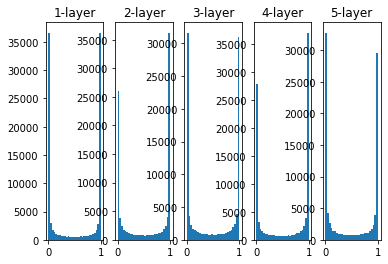

In [8]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있군요. 여기에서 사용한 시그모이드 함수는 그 출력이 0에 가까워지자(또는 1에 가까워지자) 그 미분은 0에 다가갑니다. 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라집니다. 이것이 기울기 소실(gradient vanishing)이라 알려진 문제입니다. 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있습니다.

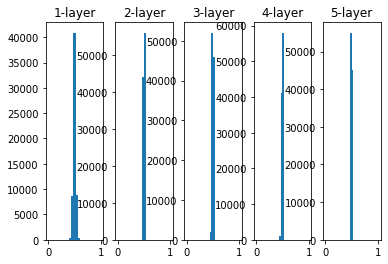

In [9]:
# 가중치를 표준편차가 0.01인 정규분포로 초기화할 때의 각 층의 활성화값 분포

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

이번에는 0.5 부근에 집중되었습니다. 앞의 예처럼 0과 1 로 치우치진 않았으니 기울기 소실 문제는 일어나지 않습니다만, 활성화값들이 치우쳤다는 것은 표현력 관점에서는 큰 문제가 있는 것이죠. 무슨 이야기냐 하면, 이 상황에서는 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어진다는 뜻입니다. 예를 들어 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를 게 없는 것이죠. 그래서 활성화값들이 치우치면 표현력을 제한한다는 관점에서 문제가 됩니다.

### Xavier 초깃값(p205)

각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했습니다. 그리고 앞 계층의 노드가 n개라면 표준편차가 1/np.sqrt(n)인 분포를 사용하면 된다는 결론을 이끌었죠.

* Xavier 초깃값 : 초깃값의 표준편차가 1/np.sqrt(n)이 되도록 설정(n은 앞 층의 노드 수)<br>
![image.png](https://i.imgur.com/zaqZO0F.png)

Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼집니다.

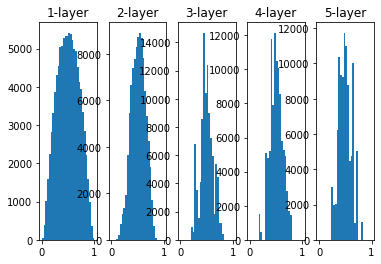

In [10]:
# 가중치의 초깃값으로 'Xavier 초깃값'을 이용할 때의 각 층의 활성화값 분포

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num)/np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavier 초깃값을 사용한 결과는 위의 그림처럼 됩니다. 이 결과를 보면 층이 깊어지면서 형태가 다소 일그러지지만, 앞에서 본 방식보다는 확실히 넓게 분포됨을 알 수 있습니다. 각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대됩니다.

위 그림은 오른쪽으로 갈수록 약간씩 일그러지고 있습니다. 이 일그러짐은 sigmoid 함수 대신 tanh 함수(쌍곡선 함수)를 이용하면 개선됩니다. 실제로 tanh 함수를 이용하면 말끔한 종 모양으로 분포됩니다. tanh 함수도 sigmoid 함수와 같은 'S'자 모양 곡선 함수입니다. 다만 tanh 함수가 원점(0,0)에서 대칭인 S 곡선인 반면, sigmoid 함수는 (x,y) = (0,0.5)에서 대칭인 S 곡선이죠. 활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져 있습니다.

### ReLU를 사용할 때의 가중치 초깃값(p207)

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과입니다. sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있죠. 그래서 Xavier 초깃값이 적당합니다. 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용하라고 권장합니다. 이 특화된 초깃값을 찾아낸 카이밍 히(Kaiming He)의 이름을 따 He 초깃값이라 합니다. He 초깃값은 앞 계층의 노드가 n개일 때, 표준편차가 np.sqrt(2/n)인 정규분포를 사용합니다. Xavier 초깃값이 np.sqrt(1/n)이었죠? ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 (직감적으로) 해석할 수 있겠습니다.

* 활성화 함수로 ReLU를 사용한 경우의 가중치 초깃값에 따른 활성화값 분포 변화<br>

![image.png](https://i.imgur.com/vCwlmQl.png)

결과를 보면 std=0.01일 때의 각 층의 활성화값들은 아주 작은 값들입니다. 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻입니다. 이는 중대한 문제이며, 실제로도 학습이 거의 이뤄지지 않을 것입니다.<br>
이어서 Xavier 초깃값 결과를 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 커집니다. 실제로 층이 깊어지면 활성화값들의 치우침도 커지고, 학습할 때 '기울기 소실' 문제를 일으킵니다.<br>
마지막으로 He 초깃값은 모든 층에서 균일하게 분포되었습니다. 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것으로 기대할 수 있습니다.<br><br>
이상의 실험 결과를 바탕으로, 활성화 함수로 ReLU를 사용할 때는 He 초깃값을, sigmoid나 tanh 등의 S자 모양 곡선일 때는 Xavier 초깃값을 쓰겠습니다. 이것이 현재의 모범 사례라고 할 수 있습니다.

### MNIST 데이터셋으로 본 가중치 초깃값 비교(p209)

![image.png](https://i.imgur.com/lHG0jqL.png)

### 배치 정규화 알고리즘(p210)

배치 정규화는 2015년에 제안된 방법입니다. 배치 정규화는 아직 세상에 나온 지 얼마 안 된 기법임에도 많은 연구자와 기술자가 즐겨 사용하고 있습니다. 실제로 기계학습 콘테스트의 결과를 보면 이 배치 정규화를 사용하여 뛰어난 결과를 달성한 예가 많습니다.

배치 정규화가 주목받는 이유는 다음과 같습니다.
* 학습을 빨리 진행할 수 있다(학습 속도 개선).
* 초깃값에 크게 의존하지 않는다(골치 아픈 초깃값 선택 장애여 안녕!).
* 오버피팅을 억제한다(드롭아웃 등의 필요성 감소).

배치 정규화의 기본 아이디어는 앞에서 말했듯이 각 층에서의 활성화값이 적당히 분포되도록 조정하는 것입니다. 그래서 아래 그림과 같이 데이터 분포를 정규화하는 '배치 정규화(Batch Norm) 계층'을 신경망에 삽입합니다.

![image.png](https://i.imgur.com/ce4p8vg.png)